## Importing Python Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import datetime as dt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Importing data using Pandas read_csv Method

In [ ]:
##Note:  We are working on Google colab so we are using our csv file, You can use path of excel file where it's saved
df = pd.read_csv("/content/Crime (2).csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.



,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201219928,1204,180063894,12/21/2018 09:13:13 PM,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,...,NaN,GEORGIA,NaN,AVE,12/21/2018 09:13:00 PM,NaN,39.036270,-77.049900,4D,"(39.0363, -77.0499)"
1,201301798,5016,200035833,09/13/2020 12:26:58 AM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,COLTRANE,NaN,DR,08/08/2020 05:10:00 PM,08/08/2020 12:00:00 AM,39.277840,-77.211500,5D,"(39.2778, -77.2115)"
2,201221577,5404,190000342,01/03/2019 02:48:47 AM,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,...,N,GRANDIN,NaN,AVE,01/03/2019 02:48:00 AM,01/03/2019 02:48:00 AM,39.086688,-77.144754,1D,"(39.0867, -77.1448)"
3,201221577,9053,190000342,01/03/2019 02:48:47 AM,90Z,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,ROCKVILLE,...,N,GRANDIN,NaN,AVE,01/03/2019 02:48:00 AM,01/03/2019 02:48:00 AM,39.086688,-77.144754,1D,"(39.0867, -77.1448)"
4,201294935,2303,200027681,07/16/2020 05:29:50 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,NaN,FREDERICK,NaN,RD,07/16/2020 05:29:00 PM,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"


Splitting Start_date_time into Date,Hour,Day and Minutes for visulasing the reasearch questions.

> Indented block


In [ ]:
df['Start_Date'] = pd.to_datetime(df['Start_Date_Time'])
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month
df['Day'] = df['Start_Date'].dt.day
df['Hour'] = df['Start_Date'].dt.hour
df['Minute'] = df['Start_Date'].dt.minute
df['Second'] = df['Start_Date'].dt.second
df['Date']   = df['Start_Date'].dt.date

# **IDA**

1->**Quality of Data and basic Analysis**

**a) Shape of the dataset**

In [ ]:
print(' data shape ', df.shape)

 data shape  (322033, 38)


**b) Frequency Counts**



In [ ]:
# Checking missing values in each Column
missing_values = list(df.isna().sum())


cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values))
# making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"])
# Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Dispatch Date / Time,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,Zip Code,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,End_Date_Time
Missing Values,0,49215,292,292,292,93,27260,1275,3183,1992,1992,249,27158,307572,1,316570,345,170483


        Incident ID     CR Number        Victims       Zip Code  \
count  3.220330e+05  3.220330e+05  322033.000000  318850.000000   
mean   2.012447e+08  1.717812e+08       1.022814   20876.508076   
std    9.079829e+04  6.154647e+07       0.193177     165.998624   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011663e+08  1.705479e+08       1.000000   20853.000000   
50%    2.012438e+08  1.900279e+08       1.000000   20878.000000   
75%    2.013227e+08  2.100087e+08       1.000000   20904.000000   
max    2.014028e+08  3.300378e+08      22.000000   29882.000000   

       Address Number       Latitude      Longitude           Year  \
count    2.948750e+05  322033.000000  322033.000000  322033.000000   
mean     8.401332e+03      37.943557     -74.869526    2019.030205   
std      1.604461e+04       6.572076      12.966318       1.881614   
min      1.000000e+00       0.000000     -77.516753    2016.000000   
25%      1.600000e+03      39.019219     -77.1

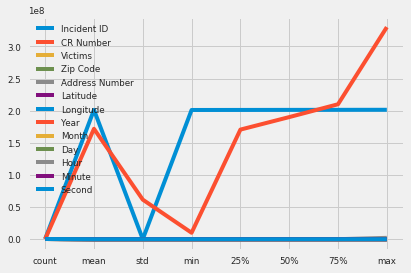

In [ ]:
##Some Basic Plots
def plot_save(filename, index):
    plt.savefig(f'/content/{filename}{index}.png')


print(df.describe())
df.describe().plot()
plot_save('describe_dataset', '0')

**c) Descriptive/Summary statistics **

Since most of our dataset consists of String Values , The mean median mode is not applicable everywhere.


---



In [ ]:
df.describe(include='all')

<ipython-input-126-174ba9bf1a5c>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Police District Number,Location,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
count,3.220330e+05,322033.0,3.220330e+05,272818,322033,322033.000000,321741,321741,321741,321940,...,322033,322033,322033,322033.000000,322033.000000,322033.000000,322033.000000,322033.000000,322033.0,322033
unique,NaN,624.0,NaN,249482,58,NaN,5,59,337,9,...,15,34795,232958,NaN,NaN,NaN,NaN,NaN,NaN,2344
top,NaN,2305.0,NaN,12/02/2019 04:39:39 PM,90Z,NaN,Crime Against Property,All Other Offenses,LARCENY - FROM AUTO,SILVER SPRING,...,3D,"(0.0, 0.0)",2019-11-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01
freq,NaN,21641.0,NaN,48,75959,NaN,148311,76488,27531,67669,...,67669,9377,43,NaN,NaN,NaN,NaN,NaN,NaN,252
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2022-11-30 21:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.012447e+08,NaN,1.717812e+08,NaN,NaN,1.022814,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2019.030205,6.723938,15.539352,13.184962,21.460509,0.0,NaN
std,9.079829e+04,NaN,6.154647e+07,NaN,NaN,0.193177,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.881614,3.395872,8.869374,6.859247,19.120183,0.0,NaN
min,2.010871e+08,NaN,1.001107e+07,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016.000000,1.000000,1.000000,0.000000,0.000000,0.0,NaN
25%,2.011663e+08,NaN,1.705479e+08,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.000000,4.000000,8.000000,9.000000,0.000000,0.0,NaN


**d) Outliers Detection **

In [ ]:
#Custom Method For removing the Outliers
def remove_outliers(df, q=0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask

In [ ]:
victims_mask = remove_outliers(df['Victims'], 0.1)

print(victims_mask)

0         False
1         False
2         False
3         False
4         False
          ...  
322028    False
322029    False
322030    False
322031    False
322032    False
Name: Victims, Length: 322033, dtype: bool


1
76488


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



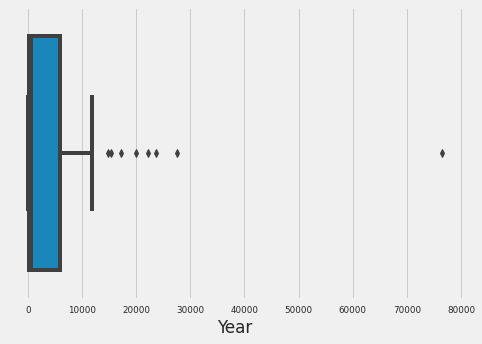

In [ ]:
value_counts = df.groupby(["Crime Name2"]).count().Year

###BOX Plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(value_counts)



# Select the values where the count is less than 3 (or 5 if you like)
minvalue = value_counts.min()
maxvalue = value_counts.max()
print(minvalue)
print(maxvalue)


**Data Transformation and Cleaning**

As our assignment focuses on most violent crimes, so we are just taking the NIBRS codes belonging to cateogry A(Voilent Crime), the below code uses Numpy Arrays to extract the data needed for analysis.

In [ ]:
#Focusing on the only Group A Data
nibrs_A=np.array(['200','13A','13B','13C','510','220','250','290','35A','35B','270','210',
                  '26A','26B','26C','26D','26E','39A','39B','39C','39D','09A','09B','09C',
                  '100','23A','23B','23C','23D','23E','23F','23G','23H','240','370','40A',
                  '40B','120','11A','11B','11C','11D','36A','36B','280','520'])

In [ ]:
df=df[df['NIBRS Code'].isin(nibrs_A)]

The 'place' column has lot of extra information with each variable which is not needed for analysis(ex- Bank-ATM, ectarcting only Bank for visualisation). Hence the needed part in the string is extracted and extra information of the variable is replaced.

In [ ]:
#df['Place'] = df['Place'].str.extract(r'(\d+)', expand=False)
df['Place'] = df['Place'].str.replace(r'-', '')
df.head(150)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Police District Number,Location,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
0,201219928,1204,180063894,12/21/2018 09:13:13 PM,120,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,...,4D,"(39.0363, -77.0499)",2018-12-21 21:13:00,2018,12,21,21,13,0,2018-12-21
4,201294935,2303,200027681,07/16/2020 05:29:50 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,5D,"(39.1983, -77.2449)",2020-07-16 17:29:00,2020,7,16,17,29,0,2020-07-16
5,201302822,1103,200036477,NaN,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,MONTGOMERY VILLAGE,...,6D,"(39.1682, -77.175)",2020-09-21 14:32:00,2020,9,21,14,32,0,2020-09-21
6,201230089,4004,190010482,03/06/2019 04:23:43 PM,40A,1,Crime Against Society,Prostitution,COMM SEX OFF - PROSTITUTION,ROCKVILLE,...,1D,"(39.1034, -77.1559)",2019-02-28 12:00:00,2019,2,28,12,0,0,2019-02-28
9,201288711,3699,200020337,05/21/2020 05:11:18 PM,11D,1,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,WHEATON,...,4D,"(39.0935, -77.0621)",2020-05-14 12:00:00,2020,5,14,12,0,0,2020-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,201319268,1316,210005122,02/09/2021 09:58:46 AM,13C,1,Crime Against Person,Intimidation,ASSAULT - INTIMIDATION (INCLUDES STALKING),SILVER SPRING,...,3D,"(38.9924, -76.9928)",2021-02-05 11:08:00,2021,2,5,11,8,0,2021-02-05
228,201319296,2305,210005139,02/09/2021 11:40:19 AM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,CITY OF TAKOMA PARK,...,8D,"(38.9859, -76.9881)",2021-02-09 10:38:00,2021,2,9,10,38,0,2021-02-09
229,201319299,2608,210005162,02/09/2021 02:14:16 PM,26E,1,Crime Against Property,Wire Fraud,FRAUD BY WIRE,CITY OF TAKOMA PARK,...,8D,"(38.9746, -77.0122)",2021-02-04 12:00:00,2021,2,4,12,0,0,2021-02-04
230,201319401,2303,210005278,02/10/2021 08:40:52 AM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,CITY OF TAKOMA PARK,...,8D,"(39.0366, -77.0309)",2021-02-10 08:40:00,2021,2,10,8,40,0,2021-02-10


Setting the index NIBRS Codes for our future visulizations

In [ ]:
df = df.rename(columns={'NIBRS Code': 'NIBRS_Code'})
df = df.set_index('NIBRS_Code')
df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,Police District Number,Location,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
NIBRS_Code,,,,,,,,,,,,,,,,,,,,,
120,201219928,1204,180063894,12/21/2018 09:13:13 PM,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,11100 BLK GEORGIA AVE,...,4D,"(39.0363, -77.0499)",2018-12-21 21:13:00,2018,12,21,21,13,0,2018-12-21
23C,201294935,2303,200027681,07/16/2020 05:29:50 PM,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,...,5D,"(39.1983, -77.2449)",2020-07-16 17:29:00,2020,7,16,17,29,0,2020-07-16
11A,201302822,1103,200036477,NaN,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,MONTGOMERY VILLAGE,8500 BLK SNOUFFER SCHOOL RD,...,6D,"(39.1682, -77.175)",2020-09-21 14:32:00,2020,9,21,14,32,0,2020-09-21
40A,201230089,4004,190010482,03/06/2019 04:23:43 PM,1,Crime Against Society,Prostitution,COMM SEX OFF - PROSTITUTION,ROCKVILLE,15100 BLK FREDERICK RD,...,1D,"(39.1034, -77.1559)",2019-02-28 12:00:00,2019,2,28,12,0,0,2019-02-28
11D,201288711,3699,200020337,05/21/2020 05:11:18 PM,1,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,WHEATON,14500 BLK HOMECREST RD,...,4D,"(39.0935, -77.0621)",2020-05-14 12:00:00,2020,5,14,12,0,0,2020-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23F,201396100,2305,220044778,10/13/2022 07:40:56 AM,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,GERMANTOWN,20400 BLK APPLE HARVEST CIR,...,5D,"(39.1897, -77.2433)",2022-10-12 22:55:00,2022,10,12,22,55,0,2022-10-12
23D,201397766,2308,220046615,10/24/2022 12:17:38 PM,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,800 BLK HOUSTON AVE,...,3D,"(38.9912, -77.0018)",2022-10-10 12:17:00,2022,10,10,12,17,0,2022-10-10
13A,201397815,1303,220046906,10/25/2022 07:37:10 PM,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-STRONG-ARM,WHEATON,2200 BLK GEORGIAN WAY,...,4D,"(39.0544, -77.0462)",2022-10-25 19:37:00,2022,10,25,19,37,0,2022-10-25


Normality Visualizations using bargraphs

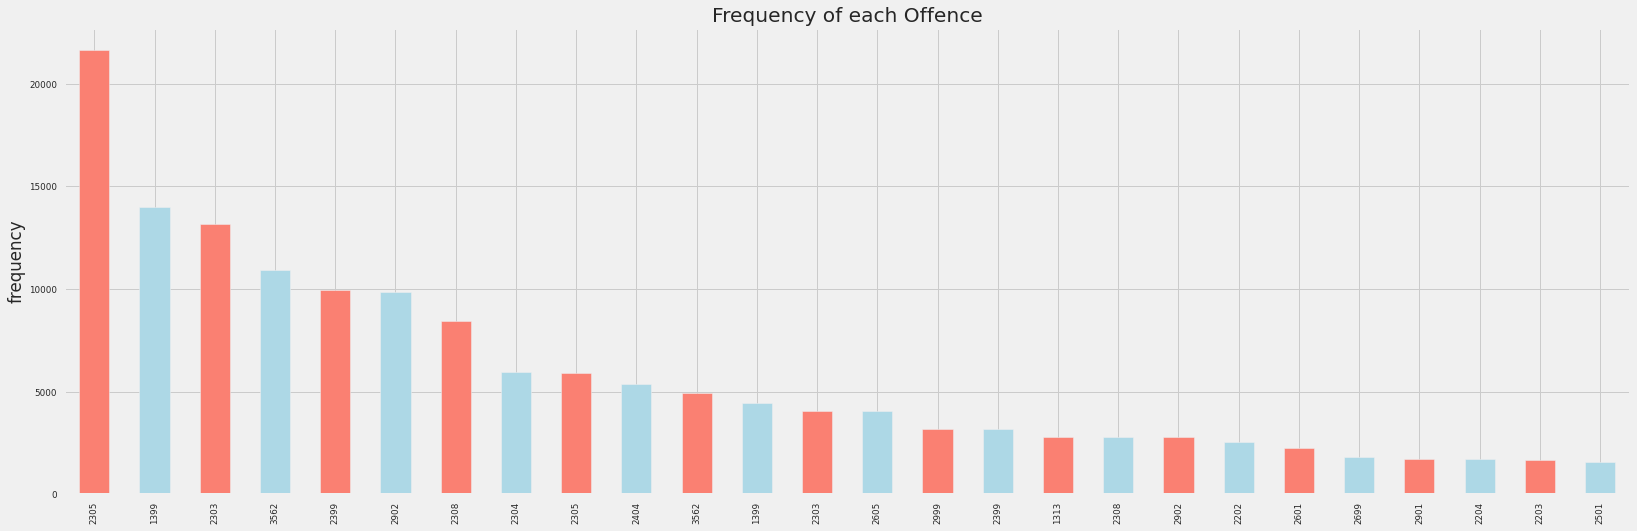

In [ ]:
off_vc = pd.value_counts(df['Offence Code'])
off_vc[off_vc>1500].plot.bar(figsize=(25, 8), title='Frequency of each Offence', ylabel='frequency', color=["salmon", "lightblue"])

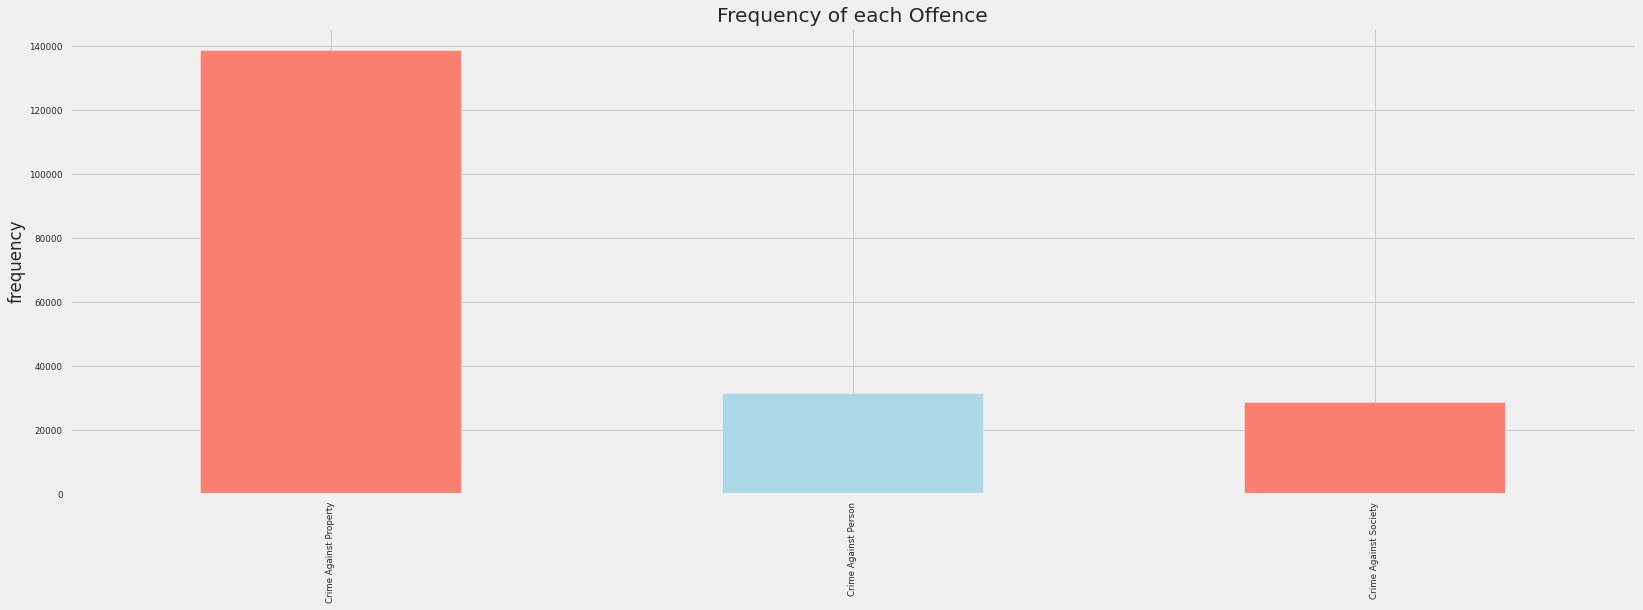

In [ ]:
crime1_vc = pd.value_counts(df['Crime Name1'])
crime1_vc[crime1_vc>1500].plot.bar(figsize=(25, 8), title='Frequency of each Offence', ylabel='frequency', color=["salmon", "lightblue"])

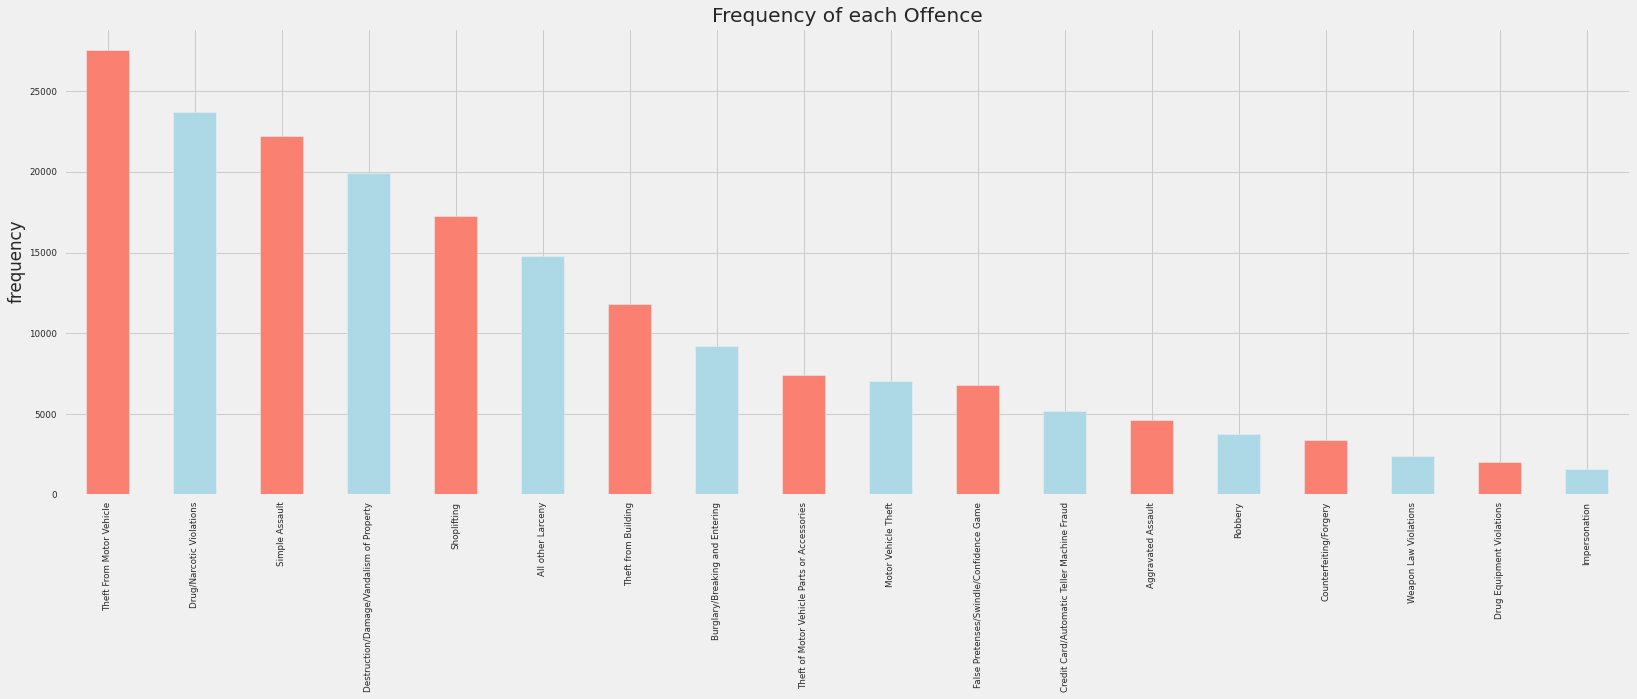

In [ ]:
crime2_vc = pd.value_counts(df['Crime Name2'])
crime2_vc[crime2_vc>1500].plot.bar(figsize=(25, 8), title='Frequency of each Offence', ylabel='frequency', color=["salmon", "lightblue"])

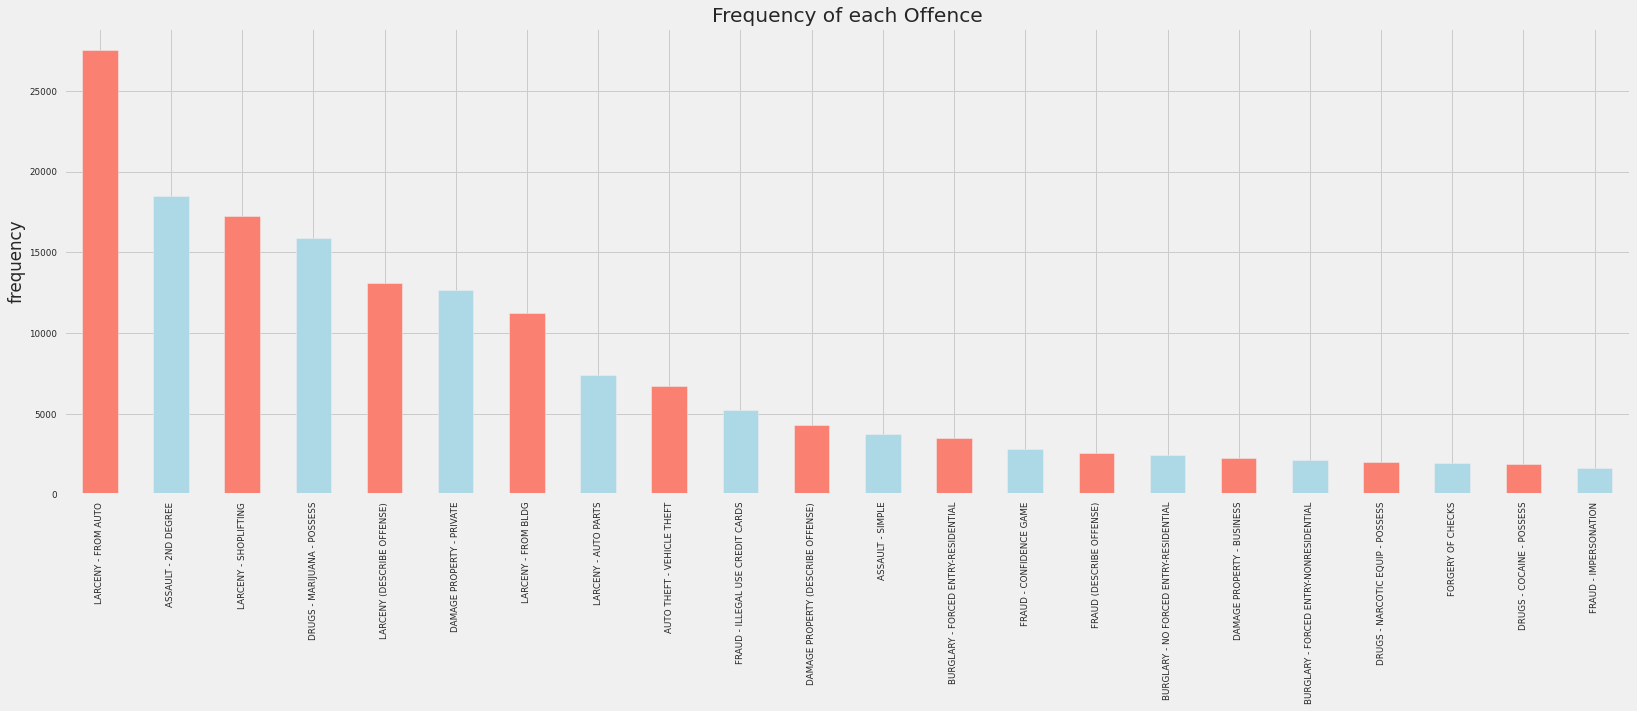

In [ ]:
crime3_vc = pd.value_counts(df['Crime Name3'])
crime3_vc[crime3_vc>1500].plot.bar(figsize=(25, 8), title='Frequency of each Offence', ylabel='frequency', color=["salmon", "lightblue"])

# **Droping the columns which not part of our reasearch questions and analysis**

In [ ]:
df=df.drop(columns=['Dispatch Date / Time','Block Address','City','Zip Code','Sector', 'Beat', 'PRA', 'Address Number','Street Prefix', 'Street Name', 'Street Suffix','Start_Date_Time','End_Date_Time','Location'])

Characteristics of dataset

1.Top 8 Records

In [ ]:
df.head(8)

,Incident ID,Offence Code,CR Number,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,State,Agency,...,Longitude,Police District Number,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
NIBRS_Code,,,,,,,,,,,,,,,,,,,,,
120,201219928,1204,180063894,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,MD,MCPD,...,-77.049900,4D,2018-12-21 21:13:00,2018,12,21,21,13,0,2018-12-21
23C,201294935,2303,200027681,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,MD,MCPD,...,-77.244900,5D,2020-07-16 17:29:00,2020,7,16,17,29,0,2020-07-16
11A,201302822,1103,200036477,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,MONTGOMERY VILLAGE,MD,MCPD,...,-77.175049,6D,2020-09-21 14:32:00,2020,9,21,14,32,0,2020-09-21
40A,201230089,4004,190010482,1,Crime Against Society,Prostitution,COMM SEX OFF - PROSTITUTION,ROCKVILLE,MD,MCPD,...,-77.155941,1D,2019-02-28 12:00:00,2019,2,28,12,0,0,2019-02-28
11D,201288711,3699,200020337,1,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,WHEATON,MD,MCPD,...,-77.062143,4D,2020-05-14 12:00:00,2020,5,14,12,0,0,2020-05-14
220,201299156,2203,200032643,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,BETHESDA,MD,MCPD,...,-77.139000,2D,2020-08-21 03:30:00,2020,8,21,3,30,0,2020-08-21
35A,201141912,3540,170516482,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - SYNTHETIC NARCOTIC - SELL,BETHESDA,MD,MCPD,...,-77.124753,2D,2017-06-29 17:56:00,2017,6,29,17,56,0,2017-06-29
35A,201141912,3542,170516482,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - SYNTHETIC NARCOTIC - POSSESS,BETHESDA,MD,MCPD,...,-77.124753,2D,2017-06-29 17:56:00,2017,6,29,17,56,0,2017-06-29




```
# This is formatted as code
```

2.Bottom 8 Records

In [ ]:
df.tail(8)

,Incident ID,Offence Code,CR Number,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,State,Agency,...,Longitude,Police District Number,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
NIBRS_Code,,,,,,,,,,,,,,,,,,,,,
250,201396583,2501,220045242,1,Crime Against Property,Counterfeiting/Forgery,FORGERY OF CHECKS,BETHESDA,MD,MCPD,...,-77.0955,2D,2022-10-02 15:33:00,2022,10,2,15,33,0,2022-10-02
23F,201397769,2305,220046803,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,MD,MCPD,...,-77.0247,3D,2022-10-21 18:00:00,2022,10,21,18,0,0,2022-10-21
23H,201397774,2316,220046835,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,ROCKVILLE,MD,MCPD,...,0.0000,1D,2022-10-22 15:00:00,2022,10,22,15,0,0,2022-10-22
23F,201396100,2305,220044778,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,GERMANTOWN,MD,MCPD,...,-77.2433,5D,2022-10-12 22:55:00,2022,10,12,22,55,0,2022-10-12
23D,201397766,2308,220046615,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,MD,MCPD,...,-77.0018,3D,2022-10-10 12:17:00,2022,10,10,12,17,0,2022-10-10
13A,201397815,1303,220046906,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-STRONG-ARM,WHEATON,MD,MCPD,...,-77.0462,4D,2022-10-25 19:37:00,2022,10,25,19,37,0,2022-10-25
23C,201397675,2303,220046652,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,MONTGOMERY VILLAGE,MD,GPD,...,-77.1873,6D,2022-10-24 15:34:00,2022,10,24,15,34,0,2022-10-24
23H,201397752,2316,220046795,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,WHEATON,MD,MCPD,...,-77.0748,4D,2022-10-25 10:36:00,2022,10,25,10,36,0,2022-10-25


Basic Plots

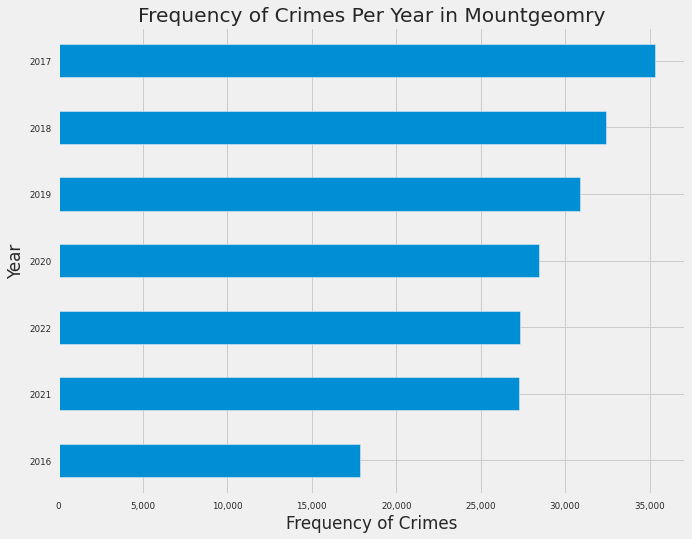

In [ ]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Mountgeomry")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Crime Against Property    138734
Crime Against Person       31747
Crime Against Society      28706
Other                        272
Name: Crime Name1, dtype: int64


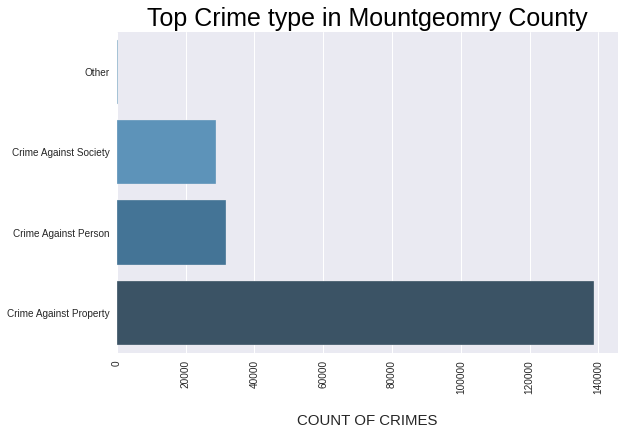

In [ ]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = df['Crime Name1'].value_counts().sort_values(ascending=False).head()
print(top_5_crimes)
temp = df.groupby('Crime Name1', as_index=False).agg({"Incident ID": "count"})
temp = temp.sort_values(by=['Incident ID'], ascending=False).head()
temp = temp.sort_values(by='Incident ID', ascending=True)
sns.barplot(x='Incident ID', y='Crime Name1', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top Crime type in Mountgeomry County", fontdict = {'fontsize': 25, 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [ ]:

#using value counts to get the unique values in each robbery type.
narc=df[df['Crime Name2']=='Robbery']
narc_data=pd.DataFrame({"Counts":narc['Crime Name3'].value_counts(),"Description":narc['Crime Name3'].value_counts().index})
narc_data.reset_index(inplace=True)
narc_data=narc_data.drop(columns=['index'],axis=1)
narc_data.head()

,Counts,Description
0,791,ROBBERY - STREET-STRONG-ARM
1,455,ROBBERY - STRONG ARM
2,352,ROBBERY - STREET-GUN
3,291,ROBBERY - GUN
4,273,ROBBERY - KNIFE


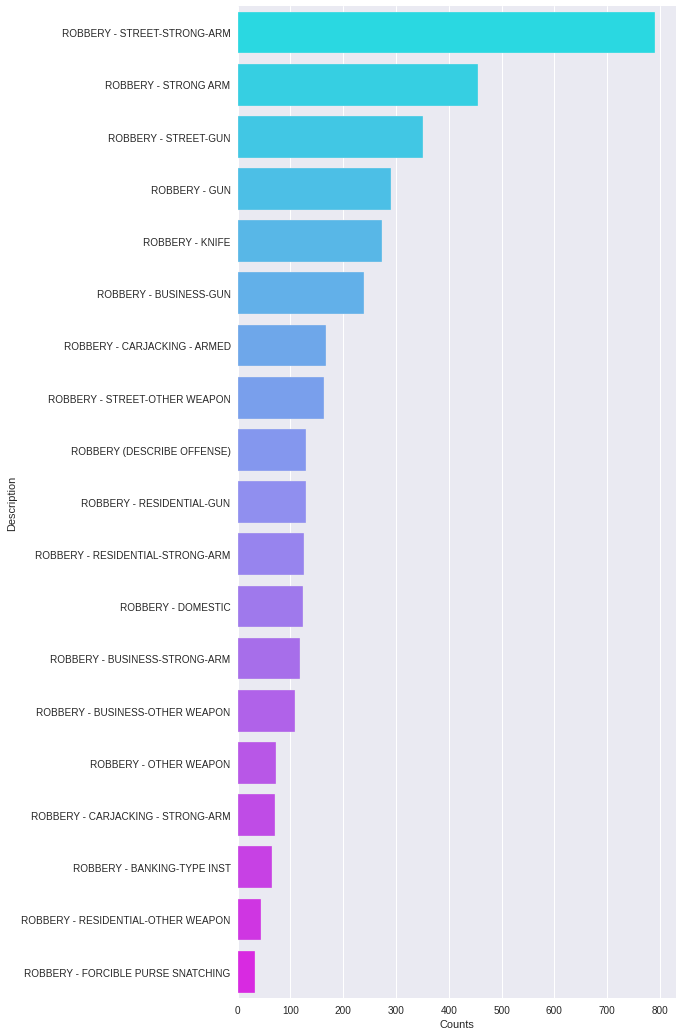

In [ ]:
#plotting a bargraph with count on the x-axis and type of robbery on y-axis
plt.figure(figsize=(7,17))
sns.barplot(y="Description", x= "Counts", data=narc_data,palette="cool" )

# **Exploratory Data Analysis: **

From the above dataset, We can see that columns with high number of missing values are related to the geogrpahical location of the crime scene i.e., address, street, block address etc. We have around 865131 null values in our datset and most of the values are not numeric. We are only droping the rows that are not the part of our analysis

In [ ]:
#The missing values in Crime Name1/2/3 are all missing on the same row, hence dropping them.
#once that row is dropped from CrimeName1 similar rows will automatically be dropped from others.
df = df.dropna(axis=0, subset=['Crime Name1'])
df

,Incident ID,Offence Code,CR Number,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,State,Agency,...,Longitude,Police District Number,Start_Date,Year,Month,Day,Hour,Minute,Second,Date
NIBRS_Code,,,,,,,,,,,,,,,,,,,,,
120,201219928,1204,180063894,1,Crime Against Property,Robbery,ROBBERY - STREET-GUN,WHEATON,MD,MCPD,...,-77.049900,4D,2018-12-21 21:13:00,2018,12,21,21,13,0,2018-12-21
23C,201294935,2303,200027681,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,MD,MCPD,...,-77.244900,5D,2020-07-16 17:29:00,2020,7,16,17,29,0,2020-07-16
11A,201302822,1103,200036477,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,MONTGOMERY VILLAGE,MD,MCPD,...,-77.175049,6D,2020-09-21 14:32:00,2020,9,21,14,32,0,2020-09-21
40A,201230089,4004,190010482,1,Crime Against Society,Prostitution,COMM SEX OFF - PROSTITUTION,ROCKVILLE,MD,MCPD,...,-77.155941,1D,2019-02-28 12:00:00,2019,2,28,12,0,0,2019-02-28
11D,201288711,3699,200020337,1,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,WHEATON,MD,MCPD,...,-77.062143,4D,2020-05-14 12:00:00,2020,5,14,12,0,0,2020-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23F,201396100,2305,220044778,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,GERMANTOWN,MD,MCPD,...,-77.243300,5D,2022-10-12 22:55:00,2022,10,12,22,55,0,2022-10-12
23D,201397766,2308,220046615,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,MD,MCPD,...,-77.001800,3D,2022-10-10 12:17:00,2022,10,10,12,17,0,2022-10-10
13A,201397815,1303,220046906,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-STRONG-ARM,WHEATON,MD,MCPD,...,-77.046200,4D,2022-10-25 19:37:00,2022,10,25,19,37,0,2022-10-25


Checking the sum of missing values in all other columns

In [ ]:
df.isna().sum()

Incident ID               0
Offence Code              0
CR Number                 0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
State                     0
Agency                    0
Place                     0
Street Type               0
Latitude                  0
Longitude                 0
Police District Number    0
Start_Date                0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
Date                      0
dtype: int64

In [ ]:
#police district and street type are character values hence it is not ideal to replace them with most repeated(mode) or Average(median).
#hence filling those values with a unique value 'other' so the data maintains integrity.

df["Police District Name"].fillna('OTHER', inplace = True)
df["Street Type"].fillna('OTHER', inplace = True)

In [ ]:
df.isna().sum()

Incident ID               0
Offence Code              0
CR Number                 0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
State                     0
Agency                    0
Place                     0
Street Type               0
Latitude                  0
Longitude                 0
Police District Number    0
Start_Date                0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
Date                      0
dtype: int64

Co-orelation Matrix and Visulization

In [ ]:
df.corr().abs()

,Incident ID,CR Number,Victims,Latitude,Longitude,Year,Month,Day,Hour,Minute,Second
Incident ID,1.000000,0.762595,0.017078,0.200847,0.200666,0.985076,0.000221,0.002020,0.034234,0.016749,NaN
CR Number,0.762595,1.000000,0.011582,0.108387,0.108256,0.743318,0.062125,0.001358,0.015149,0.001501,NaN
Victims,0.017078,0.011582,1.000000,0.001287,0.001083,0.017649,0.001930,0.000363,0.005294,0.055799,NaN
Latitude,0.200847,0.108387,0.001287,1.000000,0.999746,0.201741,0.018684,0.000212,0.003584,0.000264,NaN
Longitude,0.200666,0.108256,0.001083,0.999746,1.000000,0.201569,0.018633,0.000208,0.003501,0.000131,NaN
Year,0.985076,0.743318,0.017649,0.201741,0.201569,1.000000,0.145317,0.004895,0.027922,0.010211,NaN
Month,0.000221,0.062125,0.001930,0.018684,0.018633,0.145317,1.000000,0.004288,0.002421,0.008357,NaN
Day,0.002020,0.001358,0.000363,0.000212,0.000208,0.004895,0.004288,1.000000,0.023580,0.008276,NaN
Hour,0.034234,0.015149,0.005294,0.003584,0.003501,0.027922,0.002421,0.023580,1.000000,0.057989,NaN
Minute,0.016749,0.001501,0.055799,0.000264,0.000131,0.010211,0.008357,0.008276,0.057989,1.000000,NaN


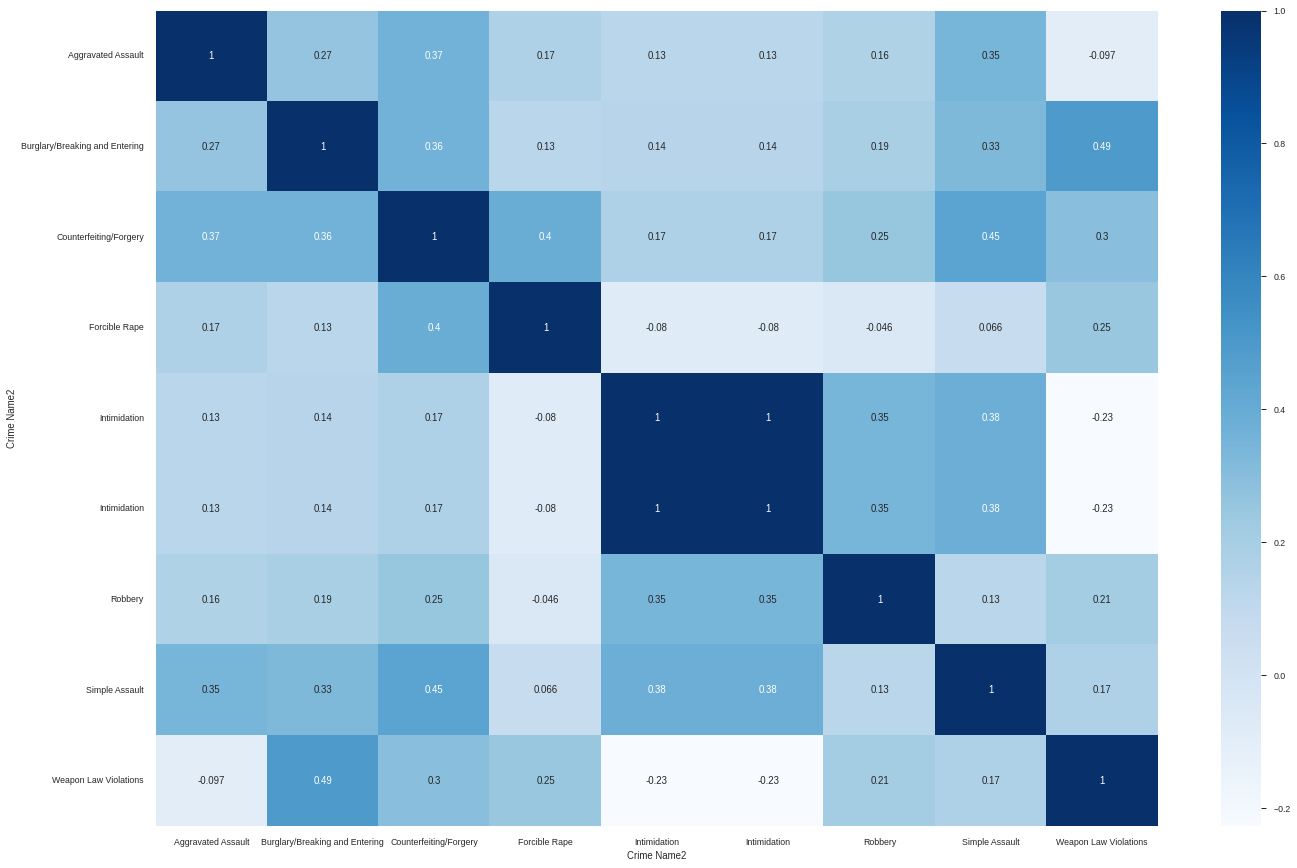

In [ ]:
corr_type = df

types = ['Simple Assault', 'Forcible Rape', 'Intimidation', 'Aggravated Assault', 'Counterfeiting/Forgery', 'Burglary/Breaking and Entering', 'Weapon Law Violations', 'Intimidation','Robbery']
types.sort()

#types += ['Total Crime Count']
#types += ['NON-CRIMINAL']

corr_type = corr_type.groupby([corr_type.Day, corr_type['Crime Name2']]).size()
corr_type = corr_type.unstack()
corr_type['Total Crime Count'] = corr_type.sum(axis=1)

corr_type = corr_type[types]
change = corr_type.pct_change()

corr = change.corr()

plt.subplots(figsize=(20,15))
s = sns.heatmap(corr, annot=True, cmap="Blues")
s = s.set_yticklabels(s.get_yticklabels(), rotation = 0)

Research Questions and **Visuals**

Question No.1 Percentages of occurance of CrimeName2 (crime type) and NIBRS

In [ ]:
# Get the count of each value
value_counts = df['Crime Name2'].value_counts()
#print(value_counts)
# Select the values where the count is less than 500 (or 5 if you like)
to_remove = value_counts[value_counts <= 5000].index
print(to_remove)
# Keep rows where the Crime Name2 column is not in to_remove
crime_name2_df = df[~df['Crime Name2'].isin(to_remove)]
print(crime_name2_df['Crime Name2'].value_counts())

Index(['Aggravated Assault', 'Robbery', 'Counterfeiting/Forgery',
       'Weapon Law Violations', 'Drug Equipment Violations', 'Impersonation',
       'Forcible Rape', 'Fondling', 'Pocket/picking', 'Forcible Sodomy',
       'Forcible Fondling', 'Embezzlement', 'Intimidation', 'Purse-snatching',
       'Extortion/Blackmail', 'Sexual Assault With An Object', 'Arson',
       'Pornography/Obscene Material', 'Wire Fraud', 'Not Mapped',
       'Stolen Property Offenses', 'Prostitution',
       'Murder and Nonnegligent Manslaughter', 'Kidnapping/Abduction',
       'From Coin/Operated Machine or Device', 'Statuory Rape',
       'Assisting or Promoting Prostitution', 'Welfare Fraud',
       'Justifiable Homicide', 'All Other Offenses', 'Negligent Manslaughter',
       'Operating/Promoting/Assisting Gambling', 'Bribery'],
      dtype='object')
Theft From Motor Vehicle                       27531
Drug/Narcotic Violations                       23738
Simple Assault                                 2

Text(0.5, 1.0, 'crime category analysis composition from 2016 to 2022')

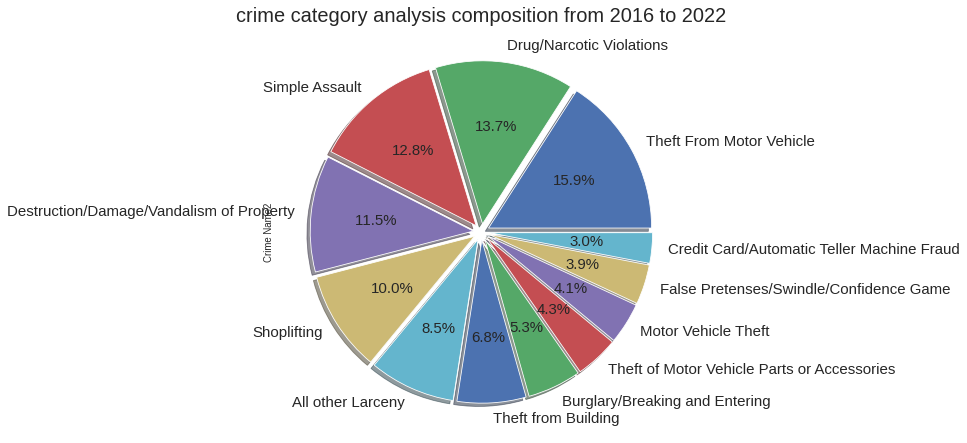

In [ ]:
##Visulization 1
##NIBRS Code analysis on data frame
# By NIBRS Code for the period 2016 to 2022
count_uniq  =crime_name2_df['Crime Name2'].nunique()
with sns.axes_style('white'):
    # count for each sub-categories in crime name1
    crime_name2_df['Crime Name2'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.05]*count_uniq,figsize=(15,7.5),shadow=True,fontsize=15)


plt.title(label='crime category analysis composition from 2016 to 2022', fontsize=20)

(-1.1057562748722376,
 1.1022939600855792,
 -1.1081237436059008,
 1.1003868449336143)

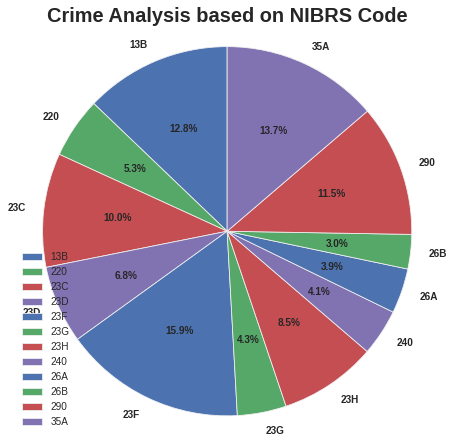

In [ ]:
###Visualization 1.2
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1);
data = crime_name2_df.groupby('NIBRS_Code').count().iloc[:, 0]
data.plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1','C2','C3'],textprops={'fontweight':'bold','fontsize': 10});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Crime Analysis based on NIBRS Code',fontweight="bold",fontsize = 20)
plt.axis('equal')

Question No. 2 Bargraph visualising the places and

*   List item
*   List item

their frequencies in crimes.

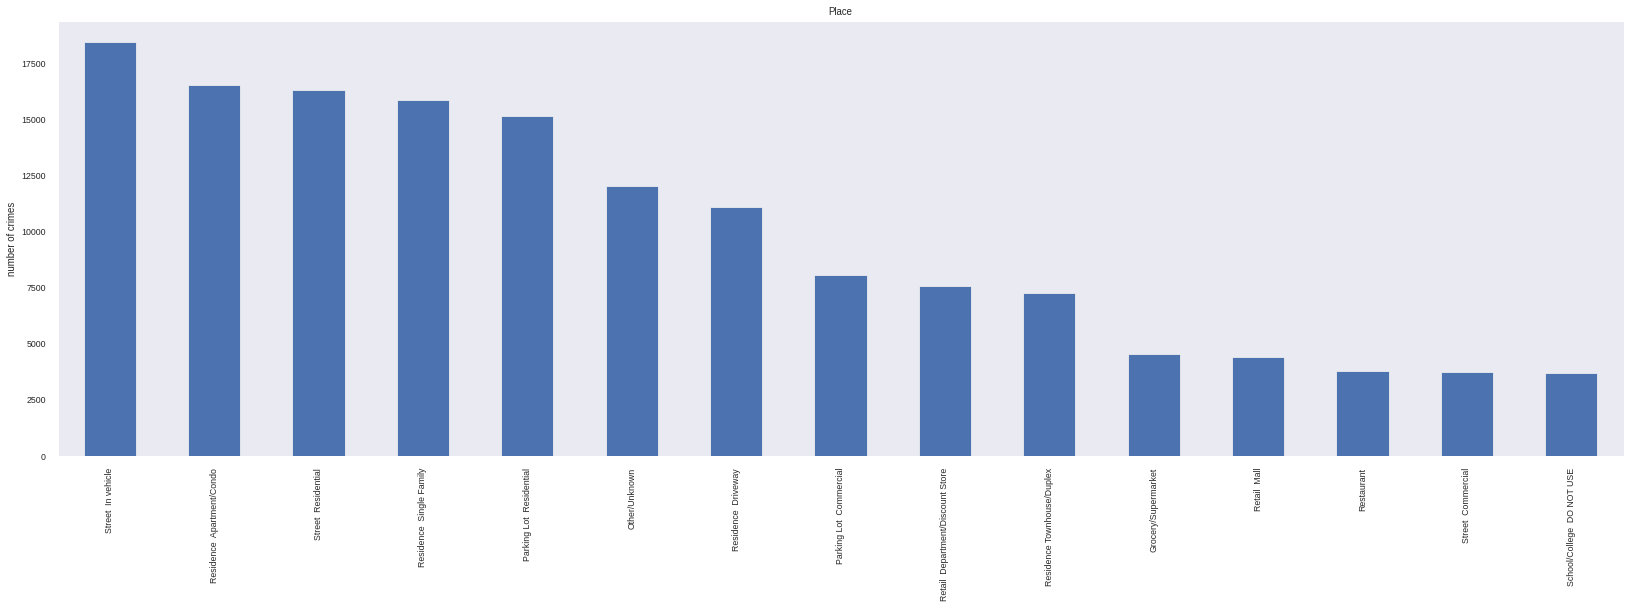

In [ ]:
crime_places = pd.value_counts(df['Place'])
crime_places[crime_places>3000].plot.bar(figsize=(25, 8), title='Place', ylabel='number of crimes')

Question No. 3   Frequency Of Crime in Each Police District

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



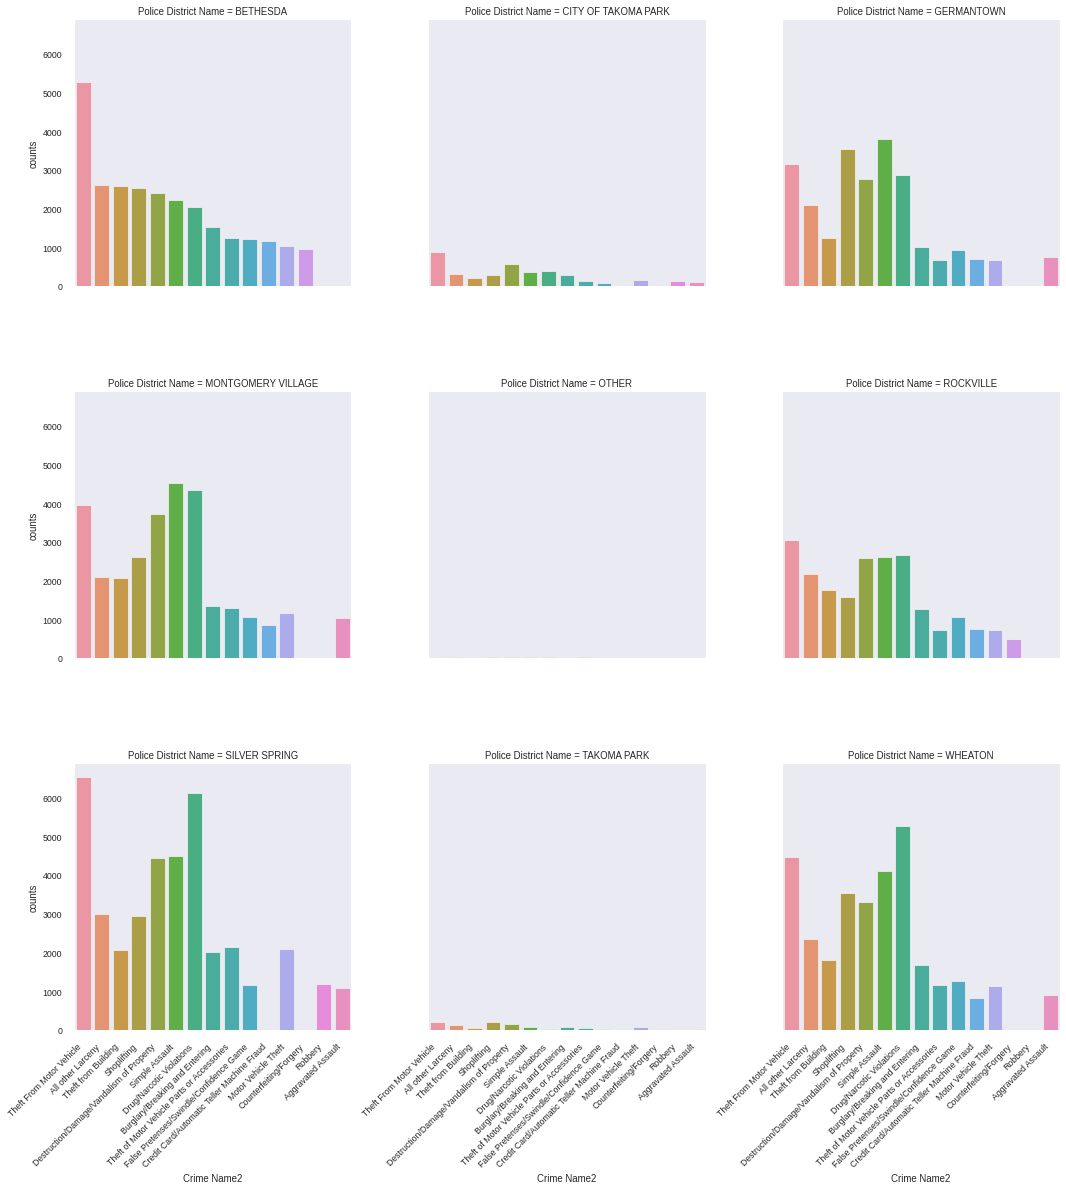

In [ ]:
# location attributes = ['Location Description','Beat','District', 'Ward', 'Community Area','X Coordinate','Y Coordinate', 'Latitude', 'Longitude','Location']
%matplotlib inline
top = df.groupby(['Police District Name', 'Crime Name2']).size().reset_index(name='counts').groupby('Police District Name').apply(lambda x: x.sort_values('counts',ascending=False).head(13))


#factor plot to make multiple plots
g =sns.catplot("Crime Name2", y='counts', col="Police District Name", col_wrap=3,
                   data=top, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)

[link text](https://)Question No.4 Crimes VS Coordinates

Note: The Map below showing all the nearby areas as well, scroll and adjust the cursor to focus on the Montgomery area

In [ ]:
# 4.2 Create a Crime Map of Montgomery using Plotly
# Limit the data to a fraction and selected categories
import plotly.express as px
df_filtered = df.sample(frac=0.01)
fig = px.scatter_mapbox(df_filtered, lat="Latitude", lon="Longitude", hover_name="Crime Name2", color='Crime Name2', hover_data=["Latitude", "Longitude"], zoom=12, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Question No.5 Analysis of crime data based on months of each year (2016-2022)

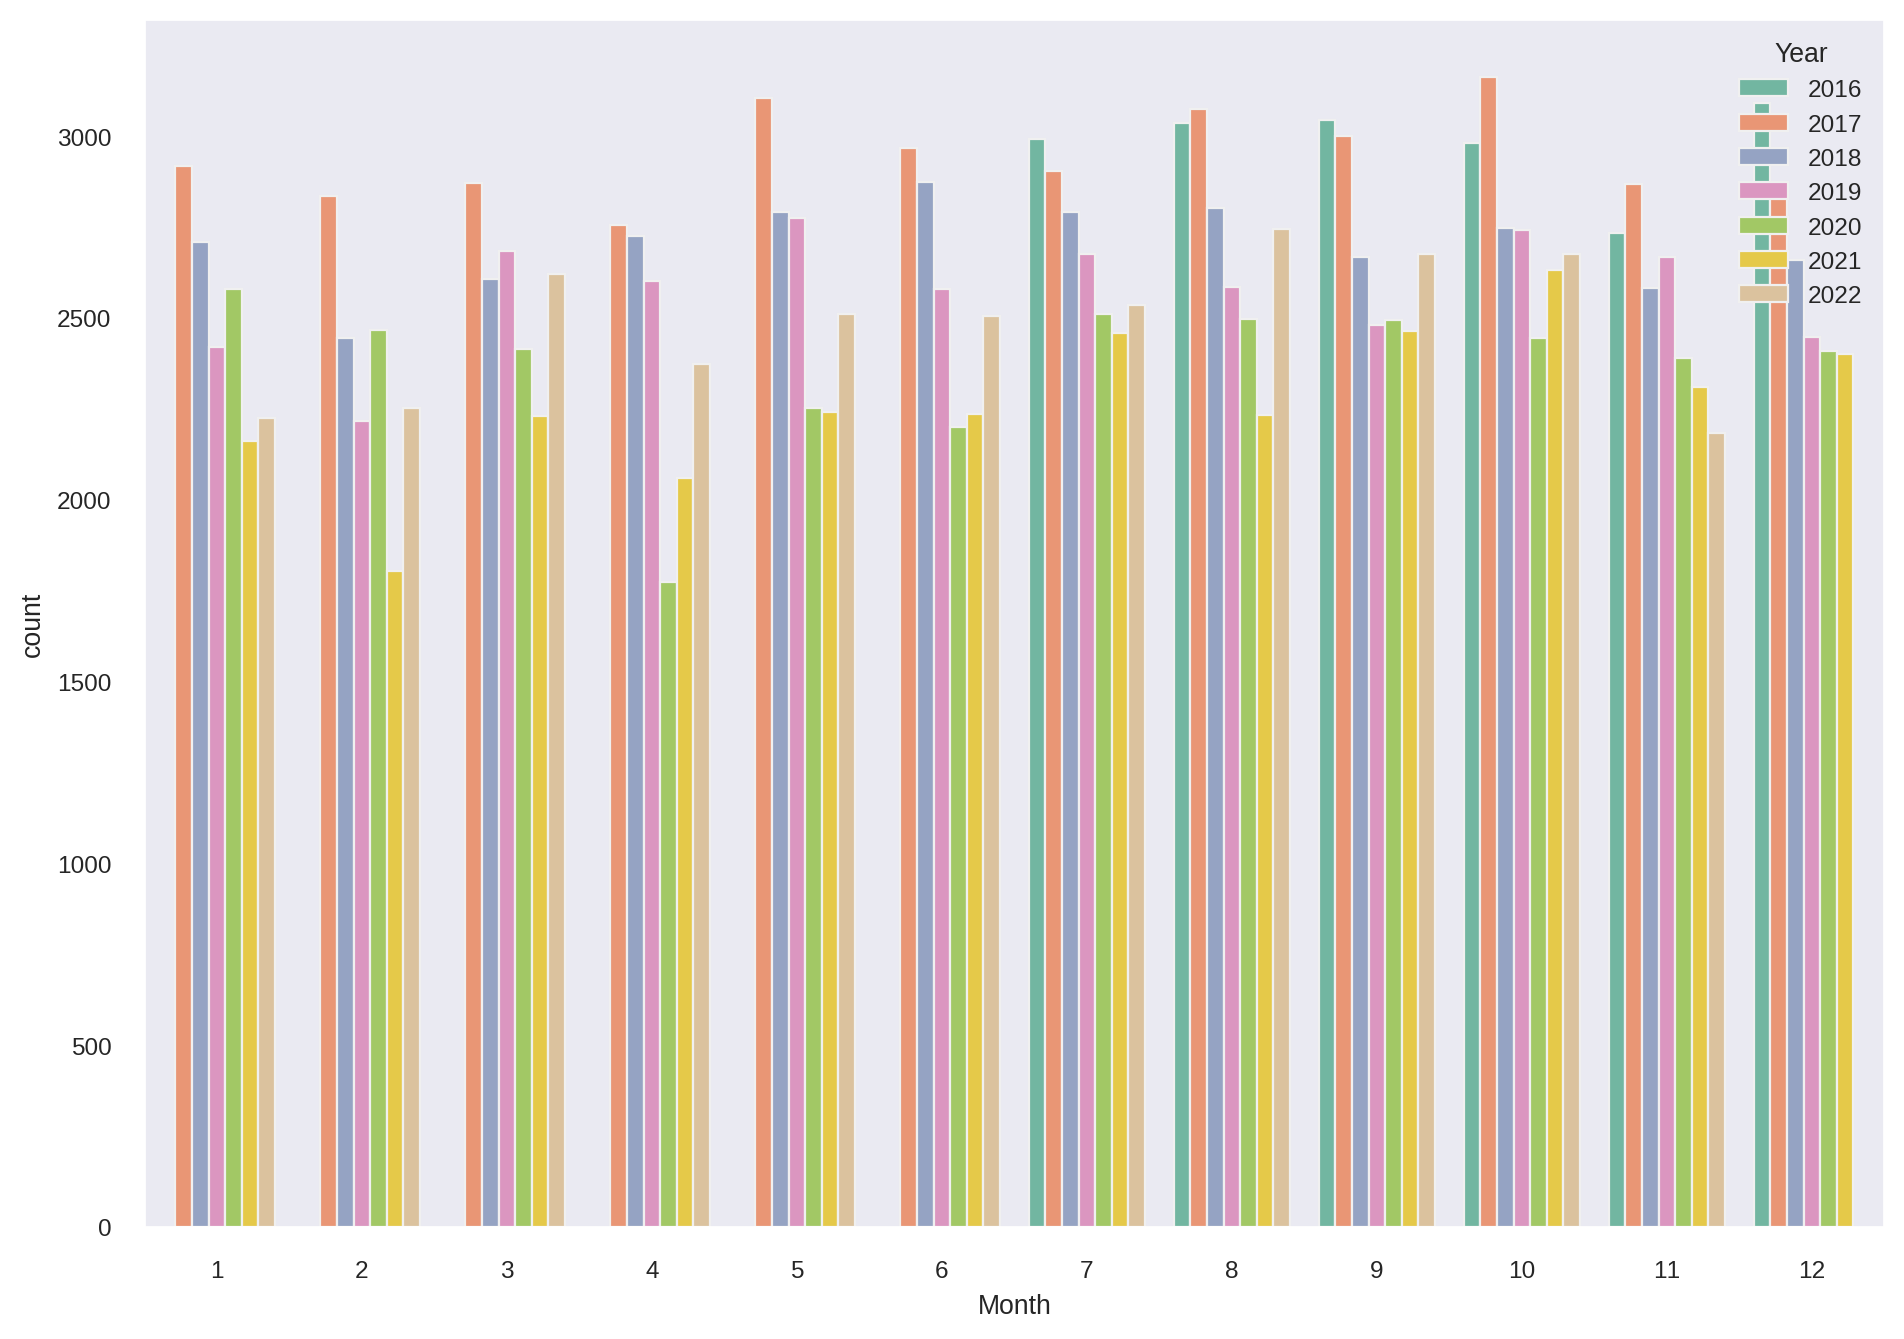

In [ ]:
plt.figure(figsize=(10,8), dpi=200)
sns.countplot(data=df, x='Month', hue='Year', palette='Set2')

Question No. 6 Analysis of crime type (crime name 1) over the years (2016-2022).

Text(0, 0.5, 'Numbers')

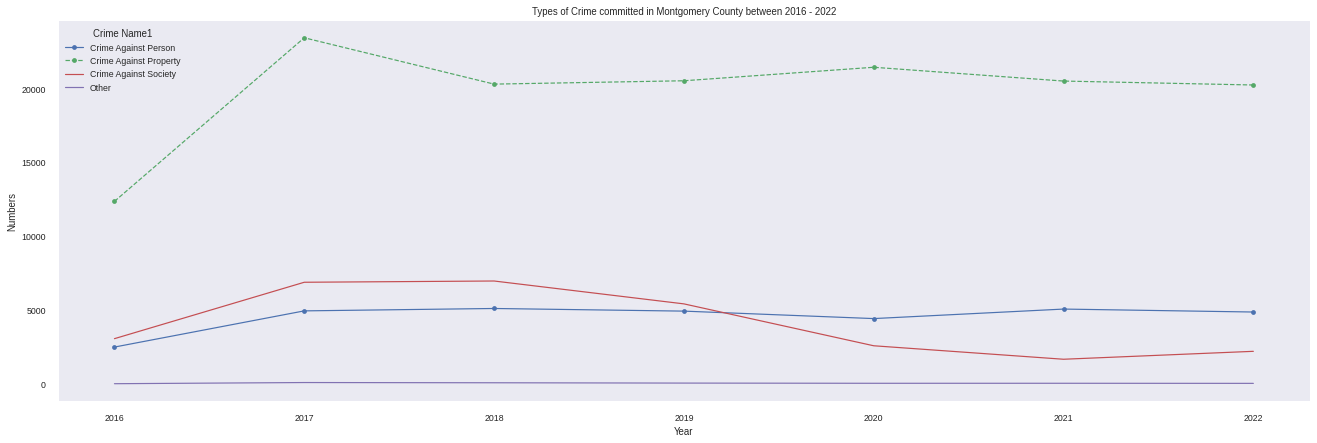

In [ ]:
crime1_yealy = df.groupby(
    'Year')['Crime Name1'].value_counts().unstack()
crime1_yealy.plot(style=['-o', '--o'], figsize=(20, 7))
# set the figure
plt.title('Types of Crime committed in Montgomery County between 2016 - 2022')
plt.xlabel('Year')
plt.ylabel('Numbers')

Question No. 7 Identifiying which time of the day has most frequency for crimes.


In [ ]:
offencode_unq = df['Offence Code'].unique()

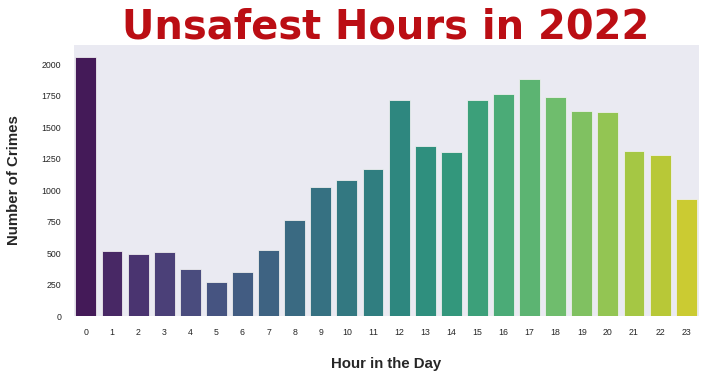

In [ ]:
###What time of the day are ciminal the busiest?
crime08 = df.loc[df["Year"]==2022]
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=crime08, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in 2022", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")



plt.show()

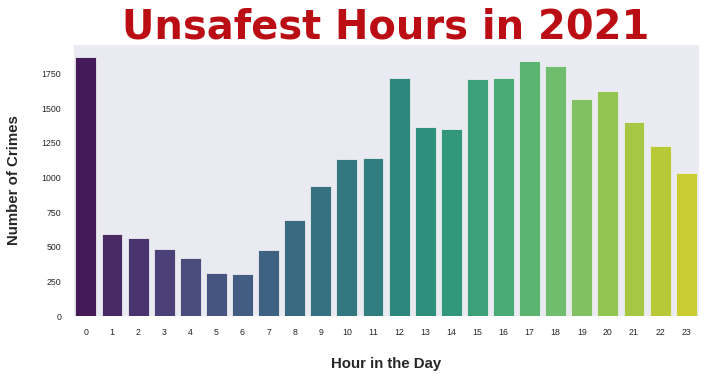

In [ ]:
###What time of the day are ciminal the busiest?
crime08 = df.loc[df["Year"]==2021]
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=crime08, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in 2021", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")



plt.show()

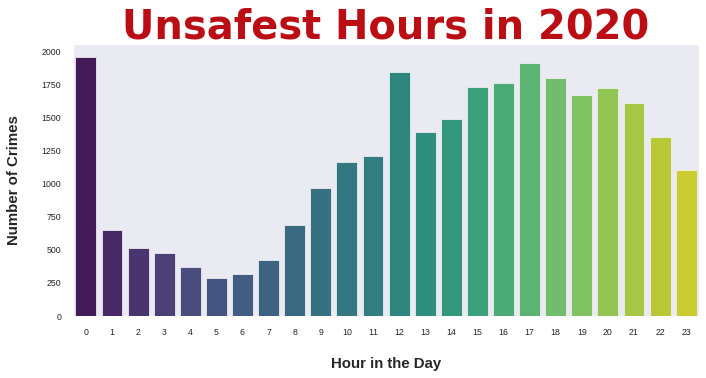

In [ ]:
###What time of the day are ciminal the busiest?
crime08 = df.loc[df["Year"]==2020]
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=crime08, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in 2020", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")



plt.show()

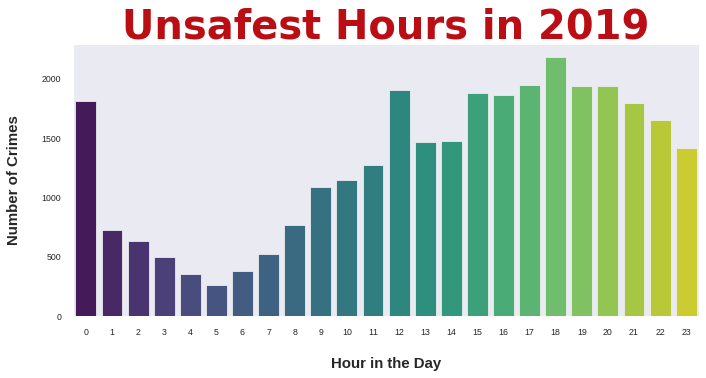

In [ ]:
###What time of the day are ciminal the busiest?
crime08 = df.loc[df["Year"]==2019]
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=crime08, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in 2019", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")



plt.show()

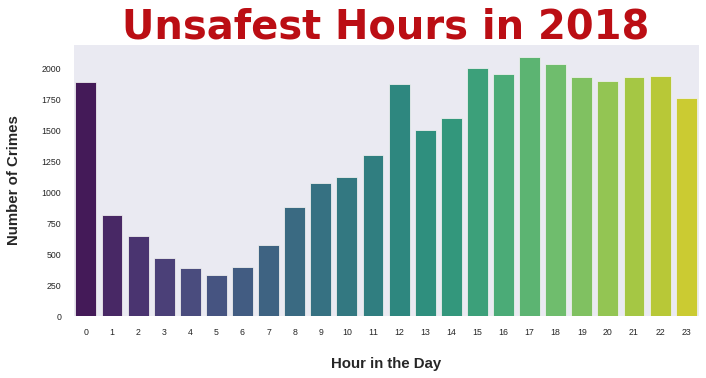

In [ ]:
###What time of the day are ciminal the busiest?
crime08 = df.loc[df["Year"]==2018]
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=crime08, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in 2018", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")



plt.show()

Question No.8 Plotting of the street types and their frequencies.

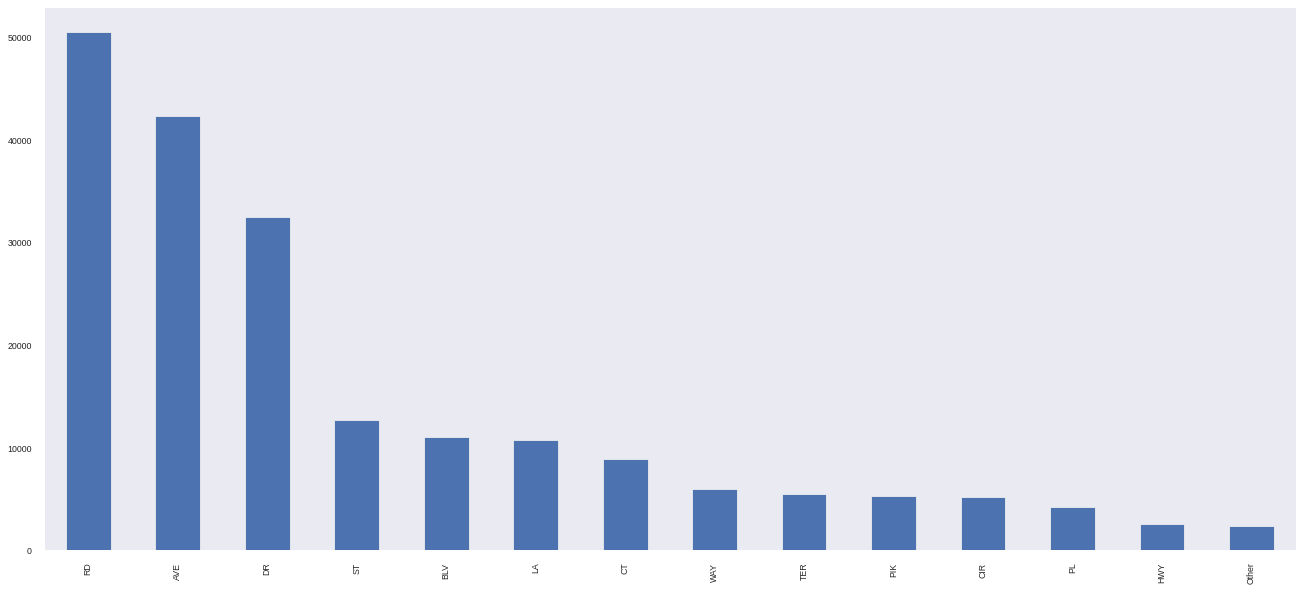

In [ ]:
st_type = df
st_type = st_type.groupby(df['Street Type']).size().sort_values(ascending=False)
other = pd.Series(st_type[13:].sum())

other.index = other.index[:-1].append(pd.Index(['Other']))

st_type = st_type[0:13].append(other)

st_type.plot(figsize=(20,10), kind='bar')

Question No. 9 Visualisation on which police agency has most cases

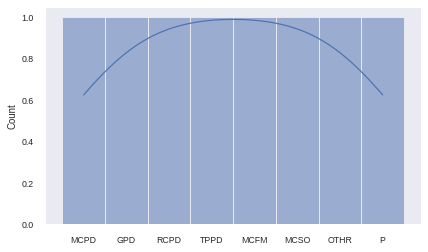

In [ ]:

c1 = df
c1 = c1.groupby(df['Agency']).size().sort_values(ascending=False)
agency_name_unique = df['Agency'].unique()


sns.histplot(data=c1, x=agency_name_unique, kde=True)

Question No. 10 Using KDE to plot the average number crimes per day.

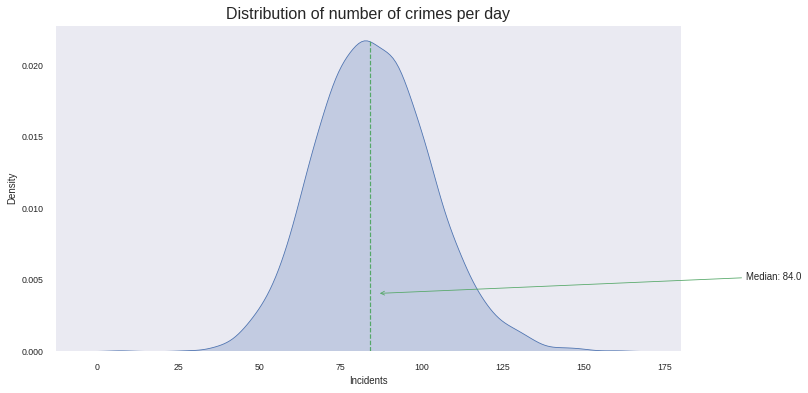

In [ ]:
#Avg. No of Crime per day
col = sns.color_palette()


plt.figure(figsize=(10, 6))
data = df.groupby('Date').count().iloc[:, 0]

sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribution of number of crimes per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()